# Installs & Imports

In [1]:
!pip install ultralytics

In [2]:
# This cell uses Secret key stored in Add-ons
# You can skip this cell if you will use your API key
# on the run (when calling model.train() )
#!pip install wandb
import wandb
from kaggle_secrets import UserSecretsClient

#user_secrets = UserSecretsClient()

#my_secret = user_secrets.get_secret("wand_api_key") 

wandb.login()#key=my_secret

wandb: Currently logged in as: bodymostafa2001. Use `wandb login --relogin` to force relogin


True

In [3]:
import cv2
from PIL import Image
from IPython import display
import matplotlib.pyplot as plt
import torch
import yaml
import random
import numpy as np

# this function will make preprocessing for the input

In [ ]:
# def parse_txt_annot(img_path, txt_path):
#     #print(img_path, txt_path)
#     img = cv2.imread(img_path)
#     w = int(img.shape[0])
#     h = int(img.shape[1])

#     file_label = open(txt_path, "r")
#     lines = file_label.read().split('\n')
    
#     boxes = []
#     classes = []
#     modified_lines=[]
#     #print(lines)
#     for i in range(0, int(len(lines)-1)):
#         #print("line" ,lines[i] )
#         objbud=lines[i].split(',')
#         class_ = 0#class_ = int(objbud[0])
#         #print("objbud" , objbud)
#         xmin = float(float(objbud[0]) / w)#         x1 = float(objbud[0])
#         ymin = float(float(objbud[1])/ h)#         y1 = float(objbud[1])
#         xmax = float(float(objbud[2])/w)#         w1 = float(objbud[2])
#         ymax = float(float(objbud[3] )/h)#         h1 = float(objbud[3])

#         xcenter = float((xmin +xmax)/2) 
#         ycenter = float((ymin +ymax)/2)
#         width = xmax - xmin
#         height = ymax - ymin
#         new_line = ' '.join(['0' , str(xcenter) , str(ycenter) , str(width) , str(height)])
#         #xmin = int((x1*w) - (w1*w)/2.0)
#         #ymin = int((y1*h) - (h1*h)/2.0)
#         #xmax = int((x1*w) + (w1*w)/2.0)
#         #ymax = int((y1*h) + (h1*h)/2.0)
#         modified_lines.append(new_line)
#         print(modified_lines)
#     with open(txt_path, "w") as file:
#                 file.writelines(modified_lines)


# def create_paths_list(path):
#     full_path = []
#     images = sorted(os.listdir(path))
    
#     for i in images:
#         full_path.append(os.path.join(path, i))
        
#     return full_path

# def creating_files(img_files_paths, annot_files_paths):
    
#     img_files = create_paths_list(img_files_paths)
#     annot_files = create_paths_list(annot_files_paths)
    
#     for i in range(0,len(img_files)):
#         parse_txt_annot(img_files[i], annot_files[i]) #image_path_, classes_, bbox_
#         print(i)

In [ ]:
# creating_files('./yolo object detection/test/images', './yolo object detection/test/labels')

# Create model

In [4]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolov8m.yaml')  # build a new model from scratch
# model = YOLO('/kaggle/input/testing-yolo-selfie/runs/detect/train/weights/last.pt')  # load a pretrained model (recommended for training)


                   from  n    params  module                                       arguments                     
  0                  -1  1      1392  ultralytics.nn.modules.conv.Conv             [3, 48, 3, 2]                 
  1                  -1  1     41664  ultralytics.nn.modules.conv.Conv             [48, 96, 3, 2]                
  2                  -1  2    111360  ultralytics.nn.modules.block.C2f             [96, 96, 2, True]             
  3                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  4                  -1  4    813312  ultralytics.nn.modules.block.C2f             [192, 192, 4, True]           
  5                  -1  1    664320  ultralytics.nn.modules.conv.Conv             [192, 384, 3, 2]              
  6                  -1  4   3248640  ultralytics.nn.modules.block.C2f             [384, 384, 4, True]           
  7                  -1  1   1991808  ultralytics.nn.modules.conv.Conv             [384

# Train model

In [5]:
results = model.train(data='/kaggle/input/signature/data.yaml', epochs=30) 
# results = model.val()  # evaluate model 

New https://pypi.org/project/ultralytics/8.1.45 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.145 🚀 Python-3.7.12 torch-1.13.0 CUDA:0 (Tesla P100-PCIE-16GB, 16276MiB)
WARNING ⚠️ Upgrade to torch>=2.0.0 for deterministic training.
engine/trainer: task=detect, mode=train, model=yolov8m.yaml, data=/kaggle/input/signature/data.yaml, epochs=30, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_wid

AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /kaggle/input/signature/normalized yolo object detection/train/labels... 660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 660/660 [00:01<00:00, 653.12it/s]
train: WARNING ⚠️ Cache directory /kaggle/input/signature/normalized yolo object detection/train is not writeable, cache not saved.
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 80, len(boxes) = 660. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))
val: Scanning /kaggle/input/signature/normalized yolo object detection/train/labels... 660 images, 0 backgrounds, 0 corrupt: 100%|██████████| 660/660 [00:01<00:00, 504.

# Predict

In [16]:
def predict(img, conf=0.5):
    colors = [
        (255,0,0)
    ]
    output = model(img, conf=conf)
    img = output[0].orig_img
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    for j, box in enumerate(output[0].boxes.xyxy):
        x,y,x2,y2 = box
        x, y, x2, y2 = int(x), int(y), int(x2), int(y2)
        
        #print(box)
        #print(img.shape)
        img = cv2.rectangle(img,(x,y),(x2,y2),colors[0],3)
    img = np.array(img)

    plt.imshow(img)
    plt.grid(False)
    display.display(plt.gcf(),)
    plt.show()


image 1/1 /kaggle/input/signature/normalized yolo object detection/train/images/1.png: 640x640 1 Signature, 16.9ms
Speed: 3.6ms preprocess, 16.9ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


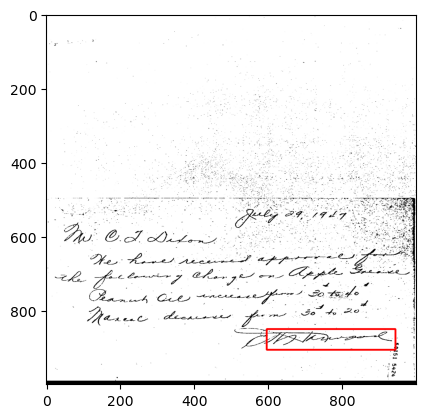

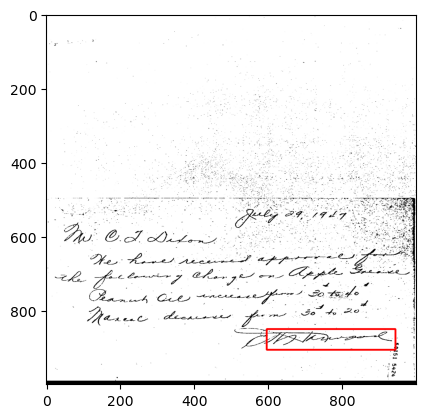


image 1/1 /kaggle/input/signature/normalized yolo object detection/train/images/10.png: 640x640 1 Signature, 16.8ms
Speed: 3.4ms preprocess, 16.8ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)


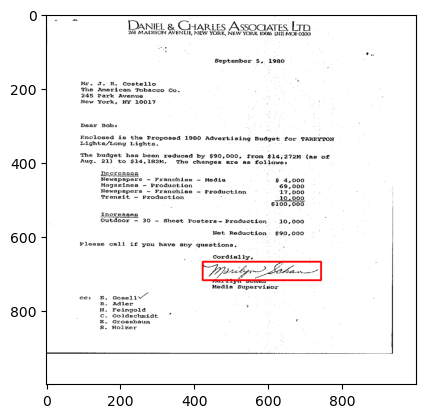

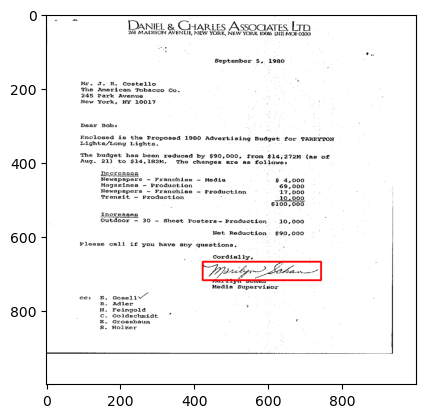

In [17]:
predict("/kaggle/input/signature/normalized yolo object detection/train/images/1.png" , conf=0.07)
predict("/kaggle/input/signature/normalized yolo object detection/train/images/10.png" , conf=0.07)